# Data Analysis on Faculty Salary and Publication

Author: Shaoyu Liu <br />
Date: 10/10/2021

## Part 1: UC System
[Section 1: Descriptive Statistics for UC Salary and Publication Data](#section1) <br /> 
[Section 2: Relationship between Salary and Publication](#section2) <br /> 
[Section 3: Tenure and Salary Analysis](#section3) <br /> 

In [3]:
import os
import warnings
warnings.simplefilter('ignore')

import pandas as pd
#pd.options.display.float_format = "{:,.2f}".format

import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns
%matplotlib inline

os.chdir('/Users/apple/Dropbox/web_scrapping_UC/temp/')

In [4]:
#load uc publication and salary data
uc_pub = pd.read_stata('scopus.dta')
#uc_salary = pd.read_stata('uc.dta')
uc_salary = pd.read_csv('/Users/apple/Desktop/research_fellow_documents/uc_salary_new.csv')
#load citescore for journals
journal_rnk = pd.read_csv('/Users/apple/Dropbox/web_scrapping_UC/scopus/scopus_aux/citescore.csv')
journal_rnk.rename(columns = {'year':'pub_yr'}, inplace = True)
journal_rnk2019 = pd.read_csv('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/scopus_journal_ranking_2019.csv')

#load research area code
asjc = pd.read_csv('/Users/apple/Dropbox/web_scrapping_UC/scopus/scopus_aux/scopus_journal_classify_updated_copy.csv')

#merge citescore into publication data
### articles with no citescore is filled with zero ... including all publications before 1990 ###
uc_pub = uc_pub.merge(journal_rnk[['source_id','pub_yr','citescore']], on = ['pub_yr','source_id'], how = 'left')
uc_pub['citescore'] = uc_pub['citescore'].fillna(0)

In [6]:
journal_rnk2019[journal_rnk2019['Scopus ASJC Code (Sub-subject Area)'] == 2002].sort_values(['RANK'])

,Scopus Source ID,Title,Citation Count,Scholarly Output,Percent Cited,CiteScore,SNIP,SJR,Scopus ASJC Code (Sub-subject Area),Scopus Sub-Subject Area,...,RANK,Rank Out Of,Publisher,Type,Open Access,Quartile,Top 10% (CiteScore Percentile),URL Scopus Source ID,Print ISSN,E-ISSN
44218,29431,Quarterly Journal of Economics,3385,149,91.9,22.7,12.503,36.220,2002.0,Economics and Econometrics,...,1.0,637.0,Oxford University Press,j,NO,1.0,True,https://www.scopus.com/sourceid/29431,335533,15314650
50527,24385,Journal of the Academy of Marketing Science,3225,192,89.1,16.8,4.986,5.309,2002.0,Economics and Econometrics,...,2.0,637.0,Springer Nature,j,NO,1.0,True,https://www.scopus.com/sourceid/24385,920703,15527824
53428,28980,Journal of Economic Perspectives,2552,183,75.4,13.9,8.576,8.761,2002.0,Economics and Econometrics,...,3.0,637.0,American Economic Association,j,NO,1.0,True,https://www.scopus.com/sourceid/28980,8953309,NaN
18284,100147318,Entrepreneurship: Theory and Practice,2205,164,90.9,13.4,3.932,3.566,2002.0,Economics and Econometrics,...,4.0,637.0,Wiley-Blackwell,j,NO,1.0,True,https://www.scopus.com/sourceid/100147318,10422587,15406520
17692,24404,Journal of Political Economy,2563,212,88.7,12.1,6.335,21.239,2002.0,Economics and Econometrics,...,5.0,637.0,University of Chicago Press,j,NO,1.0,True,https://www.scopus.com/sourceid/24404,223808,1537534X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55068,21100923619,Economic Research Guardian,0,6,0.0,0.0,NaN,NaN,2002.0,Economics and Econometrics,...,625.0,637.0,Weissberg SRL,j,NO,4.0,False,https://www.scopus.com/sourceid/21100923619,NaN,22478531
7969,22339,Nigerian Journal of Economic and Social Studies,0,5,0.0,0.0,NaN,NaN,2002.0,Economics and Econometrics,...,625.0,637.0,Nigerian Economic Society,j,NO,4.0,False,https://www.scopus.com/sourceid/22339,290092,NaN
37975,21100945715,Journal of International Logistics and Trade,0,11,0.0,0.0,NaN,NaN,2002.0,Economics and Econometrics,...,625.0,637.0,Jungseok Research Institute of International L...,j,NO,4.0,False,https://www.scopus.com/sourceid/21100945715,17382122,25087592
618,21100933830,Estudios Frontizeros,0,21,0.0,0.0,NaN,NaN,2002.0,Economics and Econometrics,...,625.0,637.0,Editura Academiei Romane,j,NO,4.0,False,https://www.scopus.com/sourceid/21100933830,NaN,23959134


In [20]:
#keep professors of interest
profs = ['Professorial-Tenure','Health Sciences Clinical Professor', 'Professorial-Non-Tenure',
        'Professor in Residence', 'Professor of Clinical']

#drop UCSF, UCOP, DANR
univ_drop = ['San Francisco','UCOP','DANR']

uc_salary = uc_salary[uc_salary['cto'].isin(profs)]
uc_salary = uc_salary[~uc_salary['university'].isin(univ_drop)]

<a id='section1'></a>

## I. Descriptive Statistics for Salary and Publication Data

Total number of individuals 37,871 (uc.dta) -> 37,918 (uc_salary_new). Total matched individuals 14,354

Total number of individuals in the following categories and excluding UCSF, DANR and UCOP:
['Professorial-Tenure','Health Sciences Clinical Professor', 
'Professorial-Non-Tenure','Professor in Residence', 'Professor of Clinical']

130,184 rows with 26,294 unique individuals. 12,024 unique individuals have department information.
11,861 unique individuals have field information.

## I. A. Salary Data

<AxesSubplot:title={'center':'Number of Observations in Salary Data by Year'}, xlabel='year', ylabel='number of observations'>

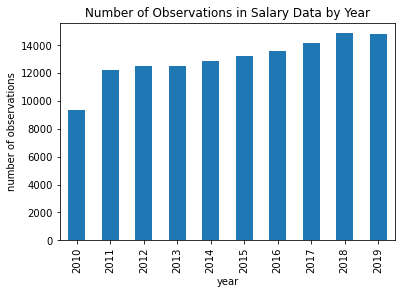

In [23]:
# number of observations and year
uc_salary.groupby(['yr'])['uid'].count().plot(kind = 'bar', 
                                               xlabel ='year',
                                               ylabel = 'number of observations', 
                                               title = 'Number of Observations in Salary Data by Year')

Text(0.5, 1.0, 'Mean salary by university')

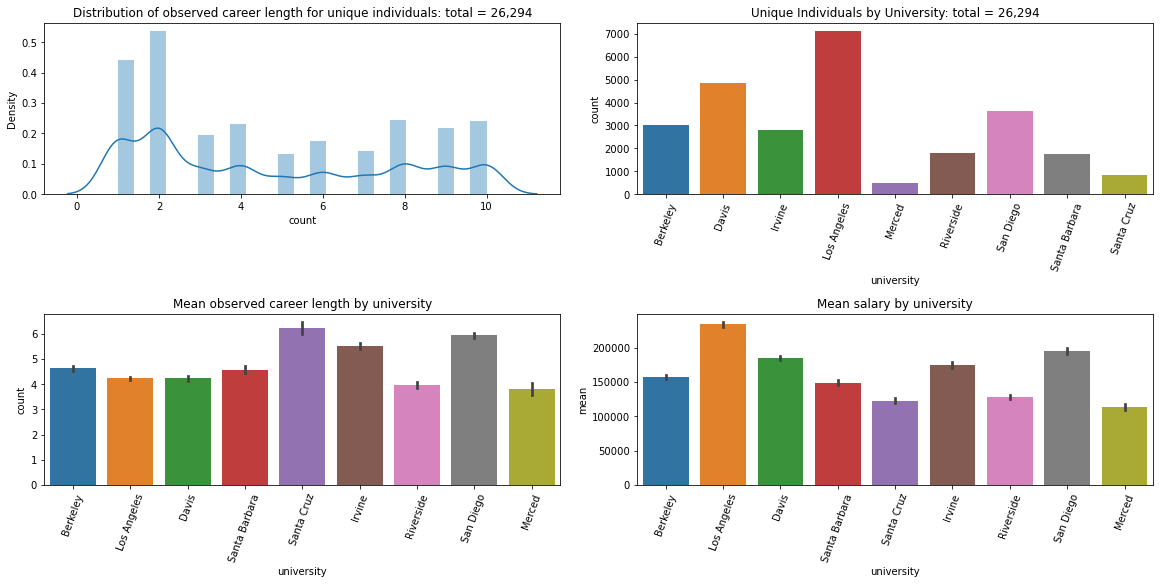

In [186]:
df1 = uc_salary.drop_duplicates(['uid','yr']).groupby(['uid','university'])['gross_pay'].agg(['count','mean']).reset_index()
df2 = df1.groupby(['university'])['uid'].count().reset_index().rename(columns = {'uid':'count'})

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8), constrained_layout=True)
#fig.tight_layout()
sns.distplot(df1['count'], ax = ax[0,0])
ax[0,0].set_title('Distribution of observed career length for unique individuals: total = 26,294')

sns.barplot(x = df2['university'], y = df2['count'], ax = ax[0,1])
ax[0,1].tick_params(axis='x', rotation=70)
ax[0,1].set_title('Unique Individuals by University: total = 26,294')

sns.barplot(x = df1['university'], y = df1['count'], ax = ax[1,0])
ax[1,0].tick_params(axis='x', rotation=70)
ax[1,0].set_title('Mean observed career length by university')

sns.barplot(x = df1['university'], y = df1['mean'], ax = ax[1,1])
ax[1,1].tick_params(axis='x', rotation=70)
ax[1,1].set_title('Mean salary by university')

Economics have relatively large standard deviation of pay, lower than medicine but higher than most arts and sciences disciplines, especially if we focus on regular pay.

## Number of Observations by Department and Fields

Note if one person is affiliated with multiple departments, then she will be counted separately in each dept.

In [42]:
obs = uc_salary.groupby(['university','field'])['uid'].nunique().unstack().T.reset_index()
obs["All"] = obs.sum(axis=1)
obs.loc['All Fields',:]= obs.sum(axis=0)
obs['# schools w/ field'] = obs[['Berkeley', 'Davis', 'Irvine', 'Los Angeles', 'Merced',
       'Riverside', 'San Diego', 'Santa Barbara', 'Santa Cruz']].notnull().sum(axis=1)
obs = obs.sort_values(['# schools w/ field','All'], ascending=False)
obs.to_excel('/Users/apple/Desktop/obs.xlsx', index=False)

In [71]:
print(len(uc_salary[uc_salary['department'].notnull()]['uid'].unique()),len(uc_salary[uc_salary['field'].notnull()]['uid'].unique()))

12024 11861


In [175]:
uc_salary[uc_salary['field'].notnull()].groupby(['university'])['uid'].nunique().reset_index()
#ss.to_csv('/Users/apple/Downloads/ss.csv')

,university,uid
0,Berkeley,1366
1,Davis,2202
2,Irvine,1403
3,Los Angeles,2841
4,Merced,195
5,Riverside,693
6,San Diego,1972
7,Santa Barbara,774
8,Santa Cruz,415


## Gross Pay Table by University and Fields
### Mean
### SD
### 90-10 gap

In [116]:
os.chdir('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/uc_salary_summary/')

#gross pay mean
gp_mean = uc_salary.groupby(['university','field'])['gross_pay'].mean().unstack().T.reset_index()
gp_mean[gp_mean.columns[1:]] = gp_mean[gp_mean.columns[1:]]/1000
gp_mean = gp_mean.merge(obs[['field','All','# schools w/ field']], on = ['field'], how = 'left').sort_values(['# schools w/ field','All'], ascending=False)
gp_mean.loc['All Fields',:] = gp_mean.mean(axis = 0)
gp_mean.to_excel('gp_mean.xlsx', index=False)

#gross pay std
gp_sd = uc_salary.groupby(['university','field'])['gross_pay'].std().unstack().T.reset_index()
gp_sd[gp_sd.columns[1:]] = gp_sd[gp_sd.columns[1:]]/1000
gp_sd = gp_sd.merge(obs[['field','All','# schools w/ field']], on = ['field'], how = 'left').sort_values(['# schools w/ field','All'], ascending=False)
gp_sd.loc['All Fields',:] = gp_sd.std(axis = 0)
gp_sd.to_excel('gp_sd.xlsx', index=False)

#10-90 percentile salary difference
gp_qt = uc_salary.groupby(['university','field'])['gross_pay'].quantile(q = 0.9) - uc_salary.groupby(['university','field'])['gross_pay'].quantile(q = 0.1) 
gp_qt = gp_qt.unstack().T.reset_index()
gp_qt[gp_qt.columns[1:]] = gp_qt[gp_qt.columns[1:]]/1000
gp_qt = gp_qt.merge(obs[['field','All','# schools w/ field']], on = ['field'], how = 'left').sort_values(['# schools w/ field','All'], ascending=False)
#gp_qt.loc['All Fields',:] = gp_qt.std(axis = 0)
gp_qt.to_excel('gp_qt.xlsx', index=False)

In [15]:
#salary standard deviation by field and rank
fields = ['Economics','Mathematics','Sociology',
              'Computer Science', 'Business', 'Internal Medicine', 
              'Psychology','Chemistry','Cellular Biology', 'History',
              'Foreign Language/Area Studies','Physics and Astronomy','Medicine','Law']

uc_salary[uc_salary['field'].isin(fields)].groupby(['field','rank'])[['gross_pay','regular_pay']].agg(['median','mean','std','max','min','count'])

gross_pay                 \
                                             median           mean   
field                         rank                                   
Business                      Assistant  213147.715  209683.270889   
                              Associate  257619.425  266844.507658   
                              Full       331362.000  339929.361842   
Cellular Biology              Assistant  121043.500  120784.887941   
                              Associate  116902.000  122780.020211   
                              Full       189141.000  204827.599528   
Chemistry                     Assistant  104431.000  107998.730334   
                              Associate  123929.000  131470.638300   
                              Full       194672.000  202772.045085   
Computer Science              Assistant  134354.000  131700.002171   
                              Associate  143076.160  145574.460253   
                              Full       188883.000  200532.393024   
Economics                     Assistant  134417.000  135870.409685   
                              Associate  169583.000  195471.897287   
                              Full       252838.590  266004.661398   
Foreign Language/Area Studies Assistant   78866.000   77700.504384   
                              Associate   98479.000  100486.501957   
                              Full       152342.000  159033.462875   
History                       Assistant   74917.000   74805.097578   
                              Associate   97154.060  101167.810879   
                              Full       148658.000  157131.835628   
Internal Medicine             Assistant  242056.000  254347.845308   
                              Associate  275000.000  317022.010739   
                              Full       278242.810  307262.370705   
Law                           Assistant   85652.500  161357.988500   
                              Associate  125106.000  123631.979091   
                              Full       304672.000  302187.320319   
Mathematics                   Assistant  100125.000  104191.128089   
                              Associate  114258.000  118877.076602   
                              Full       179012.000  183855.801340   
Medicine                      Assistant  193795.000  193218.341416   
                              Associate  222901.500  227270.929649   
                              Full       253815.000  298842.136650   
Physics and Astronomy         Assistant  114663.000  114901.034766   
                              Associate  128583.320  130278.942544   
                              Full       192518.500  198597.729749   
Psychology                    Assistant   93306.000   88784.310657   
                              Associate  113858.000  113245.306682   
                              Full       171224.970  184451.510295   
Sociology                     Assistant   94161.000   99628.663730   
                              Associate  105057.000  112077.708423   
                              Full       174480.000  178363.614246   

                                                                             \
                                                   std        max       min   
field                         rank                                            
Business                      Assistant   58377.469684   429625.0  29756.00   
                              Associate   78755.355097   500169.0  58492.00   
                              Full       105610.719543   765629.0  25197.00   
Cellular Biology              Assistant   35707.280549   294000.0   7084.00   
                              Associate   29122.080098   234334.0  73600.02   
                              Full        86317.080455   633763.0  25750.00   
Chemistry                     Assistant   36860.522277   278641.0   7875.00   
                              Associate   37444.680270   335311.0  71005.00   
                      

## I. B. UC System Publication
Note this uses the most stringent criteria for matching names
(last_name, first_name, university) == (author_id)

### Visualize number of unique individuals and those that matched to Scopus profile by university

In [129]:
"""
Map department to Scopus field code (TO DO, FOR TOP JOURNAL ANALYSIS)
#Mathematics: Journal of the American Mathematical Society 24668
#Economics: American Economic Review 22697

Economics -> ECON 2000

Chemistry -> CHEM 1600

History -> History 1202

English -> Literature and Literary Theory;1208

Sociology -> Sociology and Political Science;3312

Physics -> Physics and Astronomy(all);3100

Computer Science -> Computer Science(all);1700

Mathematics -> Mathematics(all);2600

Find Top Ranked Journal by Field 
"""
uc_matched = uc_pub.groupby(['university'])['author_id'].nunique().reset_index().rename(columns = {'author_id': 'count'})
uc_matched2 = df2.merge(uc_matched, on = ['university'], how = 'left').fillna(0).sort_values(['count_x'], ascending=False)
uc_matched2['pct matched %'] = uc_matched2['count_y'] / uc_matched2['count_x'] * 100
uc_matched2.columns = ['univesity','total individuals', 'matched individuals', 'pct matched %']
uc_matched2['matched individuals']= uc_matched2['matched individuals'].astype('int')
uc_matched2

,univesity,total individuals,matched individuals,pct matched %
3,Los Angeles,7121,3755,52.731358
1,Davis,4830,2771,57.370600
6,San Diego,3642,1991,54.667765
0,Berkeley,3033,1917,63.204748
2,Irvine,2816,1377,48.899148
5,Riverside,1782,895,50.224467
7,Santa Barbara,1747,912,52.203778
8,Santa Cruz,821,512,62.362972
4,Merced,502,224,44.621514


In [130]:
#author year level publications
uc_pub_a = uc_pub.groupby(['author_id','pub_yr']).agg({'scopus_id':'count', 'cites':'mean','citescore': 'sum', 'rank_author':'mean','num_coauthor':'mean'}).reset_index()
uc_pub_a = uc_pub_a.merge(uc_pub[['university','author_id','first_name','last_name']].drop_duplicates(), on = ['author_id'], how = 'left')
uc_pub_a.rename(columns = {'pub_yr':'yr'}, inplace = True)

#merge in min and max year of publication for each author
uc_pub_a_yrs = uc_pub_a.groupby(['author_id'])['yr'].agg(['max','min']).reset_index()
uc_pub_a = uc_pub_a.merge(uc_pub_a_yrs, on = ['author_id'], how = 'left')
uc_pub_a.rename(columns = {'max':'max_year', 'min':'min_year'}, inplace = True)
uc_pub_a.rename(columns = {'scopus_id':'count_pubs','cites':'mean_cites','citescore':'sum_citescore','rank_author':'mean_rank_author','num_coauthor':'mean_num_coauthor'}, inplace = True)

In [131]:
uc_pub_a_trim = uc_pub_a[(uc_pub_a['yr'] >= 2010) & (uc_pub_a['yr'] <= 2019)]
#impute missing year for uc_pub_a in year interval [2000, 2021]
#839 out of 14354 UNIUQE INDIVIDUALS DROPPED (WHO PUBISH ONLY BEFORE 2000)
#64% of person-year level observations dropped.
len(uc_pub_a_trim)/len(uc_pub_a)

0.3621983473661147

In [132]:
#create balanced author-year panel - impute missing years
authid = uc_pub_a['author_id'].drop_duplicates().values
new_df = pd.DataFrame({'yr': list(range(2000, 2020)) * len(authid), 'author_id': [item for item in authid for i in range(20)]})
uc_pub_a1 = new_df.merge(uc_pub_a[['author_id','yr', 'count_pubs','mean_cites','sum_citescore', 'mean_rank_author','mean_num_coauthor']], on = ['yr','author_id'], how ='left')
uc_pub_a1 = uc_pub_a1.merge(uc_pub_a[['author_id','university','first_name','last_name','max_year','min_year']].drop_duplicates(), on = ['author_id'])
uc_pub_a1 = uc_pub_a1.fillna(0)

In [133]:
#author level publications
uc_pub_b = uc_pub.groupby(['author_id']).agg({'scopus_id':'count','cites':'mean','citescore':'sum','rank_author':'mean','num_coauthor':'mean','pub_yr':['max','min']}).reset_index()
uc_pub_b.columns = ['_'.join(col).strip() for col in uc_pub_b.columns.values]
uc_pub_b['career_length'] = uc_pub_b['pub_yr_max'] - uc_pub_b['pub_yr_min']
uc_pub_b = uc_pub_b.rename(columns = {'author_id_':'author_id'})
uc_pub_b = uc_pub_b.merge(uc_pub[['university','author_id','first_name','last_name']].drop_duplicates(), on = ['author_id'], how = 'left')

In [134]:
#descriptive stats for faculty career length by university
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)
uc_pub_b.groupby(['university'])['career_length'].agg(['mean','median','max','min', q25, q75, 'count'])

,mean,median,max,min,q25,q75,count
university,,,,,,,
Berkeley,23.112676,21,151,0,12.00,34.0,1917
Davis,22.839047,21,96,0,13.00,33.0,2771
Irvine,23.970225,22,68,0,13.00,34.0,1377
Los Angeles,22.316644,21,150,0,12.00,32.0,3755
Merced,16.017857,15,50,0,9.75,22.0,224
Riverside,19.579888,17,61,0,9.50,29.0,895
San Diego,23.171773,21,82,0,13.00,32.5,1991
Santa Barbara,22.689693,21,73,0,11.00,34.0,912
Santa Cruz,23.464844,22,64,0,13.00,34.0,512


In [135]:
#descriptive stats for faculty publications by university
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)
uc_pub_b.groupby(['university']).agg({'scopus_id_count':['mean','median','max','min', q25, q75, 'count'], 'cites_mean': ['mean','median','max','min', q25, q75, 'count']})

scopus_id_count                                    cites_mean  \
                         mean median   max min q25     q75 count       mean   
university                                                                    
Berkeley            79.280125   31.0  1554   1  10   91.00  1917  41.239049   
Davis               79.122339   48.0  1531   1  15  104.00  2771  31.375849   
Irvine              85.693537   49.0  1254   1  15  108.00  1377  35.949147   
Los Angeles         81.289747   39.0  1471   1  12  100.00  3755  37.199543   
Merced              45.794643   28.0   565   1  12   56.25   224  29.010724   
Riverside           56.711732   28.0  1192   1   9   72.00   895  29.657361   
San Diego          105.456554   56.0  2230   1  19  134.50  1991  42.698577   
Santa Barbara       75.381579   33.0  1559   1  10   90.00   912  30.660080   
Santa Cruz          63.576172   36.5   764   1  12   80.25   512  37.046245   

                                                                        
                  median          max  min        q25        q75 count  
university                                                              
Berkeley       26.200000   726.588235  0.0   8.800000  54.000000  1917  
Davis          24.243590   347.617284  0.0  11.254032  41.381371  2771  
Irvine         25.779528   411.000000  0.0  11.333333  48.815126  1377  
Los Angeles    26.666667  1753.000000  0.0  11.382763  49.097815  3755  
Merced         21.720000   190.435897  0.0  11.086538  37.705508   224  
Riverside      18.727273   265.694444  0.0   6.115132  40.597812   895  
San Diego      31.217391   781.000000  0.0  15.000000  56.050569  1991  
Santa Barbara  18.791892   903.348039  0.0   6.293269  42.137914   912  
Santa Cruz     26.143895   406.405405  0.0   8.666667  48.686500   512

<a id='section2'></a>

## II. Relationship between Salary and Publication between 2010-2019

In [136]:
#merge publication and salary data
uc_pub_c = uc_pub_a1.merge(uc_salary, on = ['university','first_name','last_name','yr'], how = 'left')
print(len(uc_pub_c))
#drop faculties that have multiple records in the same year 
#(those are faculties who have multiple department affiliations)
uc_pub_c = uc_pub_c.drop_duplicates(['author_id','yr'])
print(len(uc_pub_c))

290943
287080


In [178]:
# for each year t with salary, 
#compute total number of publications from year t-1 to t-3;
#compute sum of publication citescore from year t-1 to t-3

def compute_pub_lead(df):
    df['count_pubs_1'] = df['count_pubs'].shift(1)
    df['count_pubs_2'] = df['count_pubs'].shift(2)
    df['count_pubs_3'] = df['count_pubs'].shift(3)
    df['count_pubs_4'] = df['count_pubs'].shift(4)
    df['count_pubs_5'] = df['count_pubs'].shift(5)
    df['count_pubs_1_3'] = df[['count_pubs_1','count_pubs_2','count_pubs_3']].sum(axis = 1)
    df['count_pubs_3_5'] = df[['count_pubs_3','count_pubs_4','count_pubs_5']].sum(axis = 1)
    df['count_pubs_1_5'] = df[['count_pubs_1','count_pubs_2','count_pubs_3','count_pubs_4','count_pubs_5']].sum(axis = 1)
    
    df['sum_citescore_1'] = df['sum_citescore'].shift(1)
    df['sum_citescore_2'] = df['sum_citescore'].shift(2)
    df['sum_citescore_3'] = df['sum_citescore'].shift(3)
    df['sum_citescore_4'] = df['sum_citescore'].shift(4)
    df['sum_citescore_5'] = df['sum_citescore'].shift(5)
    df['sum_citescore_1_3'] = df[['sum_citescore_1','sum_citescore_2','sum_citescore_3']].sum(axis = 1)
    df['sum_citescore_3_5'] = df[['sum_citescore_3','sum_citescore_4','sum_citescore_5']].sum(axis = 1)
    df['sum_citescore_1_5'] = df[['sum_citescore_1','sum_citescore_2','sum_citescore_3','sum_citescore_4','sum_citescore_5']].sum(axis = 1)
    return df

In [179]:
uc_pub_d = uc_pub_c.groupby(['author_id']).apply(compute_pub_lead)

#remove years where the faculty has no salary data
uc_pub_e = uc_pub_d[uc_pub_d['gross_pay'].notnull()]

In [180]:
#mean and median number of publication per year for faculty grouped by department and rank, 2000-2019
fields = ['Economics','Mathematics','Sociology',
              'Computer Science', 'Business', 'Internal Medicine', 
              'Psychology','Chemistry','Cellular Biology', 'History',
              'Foreign Language/Area Studies','Physics and Astronomy','Medicine','Law']
uc_pub_d[uc_pub_d['field'].isin(fields)].groupby(['rank','field'])['count_pubs'].agg(['median','mean','std'])

median      mean        std
rank      field                                                     
Assistant Business                          1.0  1.165179   1.373824
          Cellular Biology                  2.0  2.586957   2.481196
          Chemistry                         4.0  4.874372   4.558187
          Computer Science                  5.0  6.470899   6.840543
          Economics                         1.0  1.089744   1.466530
          Foreign Language/Area Studies     0.0  0.630303   0.884999
          History                           0.0  0.405941   0.602963
          Internal Medicine                 2.0  3.190083   3.816902
          Law                               1.5  1.500000   0.707107
          Mathematics                       2.0  2.541096   2.194434
          Medicine                          1.0  3.285714   5.933633
          Physics and Astronomy             4.0  5.651685   5.539539
          Psychology                        2.0  2.959302   2.912682
          Sociology                         1.0  1.216981   1.211097
Associate Business                          1.0  1.255556   1.434305
          Cellular Biology                  2.0  2.871429   4.486339
          Chemistry                         4.0  5.587719   5.112559
          Computer Science                  5.0  6.800000   6.632743
          Economics                         1.0  1.547619   1.708764
          Foreign Language/Area Studies     0.0  0.366154   0.752419
          History                           0.0  0.444079   0.850256
          Internal Medicine                 3.0  4.326180   4.806251
          Law                               4.0  4.000000        NaN
          Mathematics                       2.0  2.514085   2.224097
          Medicine                          2.0  3.916399   5.963282
          Physics and Astronomy             5.0  7.023669   7.600871
          Psychology                        2.0  3.131387   3.114996
          Sociology                         1.0  1.358621   1.750698
Full      Business                          1.0  1.760369   2.074300
          Cellular Biology                  2.0  3.762755   4.834059
          Chemistry                         5.0  8.164634   9.642876
          Computer Science                  6.0  7.038793   6.406826
          Economics                         2.0  2.493716   2.734416
          Foreign Language/Area Studies     0.0  0.611452   1.266025
          History                           0.0  0.737470   1.150329
          Internal Medicine                 4.0  6.014045   6.793313
          Law                               0.0  0.907767   1.344082
          Mathematics                       2.0  2.743316   3.562594
          Medicine                          4.0  7.620087  11.068159
          Physics and Astronomy             4.0  6.783981   7.109758
          Psychology                        4.0  4.751152   5.262865
          Sociology                         1.0  1.909968   2.794857

Text(0, 0.5, 'count - number of authors')

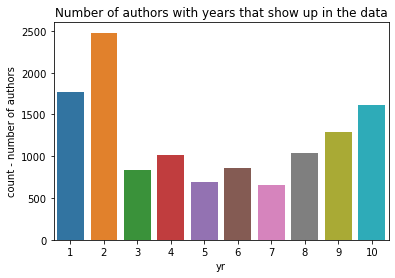

In [181]:
#note, this drops all obs that we do not observe salary.
sns.countplot(x = 'yr', data = uc_pub_e.groupby(['author_id'])['yr'].count().reset_index())
plt.title('Number of authors with years that show up in the data')
plt.ylabel('count - number of authors')

Regression for correlation between publication and salary

$Log(Salary_{i,t}+1) = \alpha + \beta_t + \gamma_i + \theta \times \sum_{m = t-1}^{t-3} {Log(pub_{i, m}+1)} + \epsilon_{i,t}$

${pub_{i, m}}$ is number of publications or total citescore for author $i$ in year $m$.

In [182]:
#write data for STATA analysis of regressions
uc_pub_e.to_csv('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/uc_pub_e.csv', index = False)

### Plot raw correlation between salary and number of publications/citescores (between 2010 and 2019)

In [183]:
def segment_corr(uc_pub_e):

    #dept_faculty = uc_pub_e[uc_pub_e['department'] == dept]['author_id'].drop_duplicates().values
    dept_faculty = uc_pub_e['author_id'].drop_duplicates().values
    uc_dept = uc_pub_e[uc_pub_e['author_id'].isin(dept_faculty)]
    
    corr = uc_dept[['gross_pay','sum_citescore_1_3','count_pubs_1_3','sum_citescore_1_5','count_pubs_1_5','sum_citescore_3_5', 'count_pubs_3_5']].corr()['gross_pay']
    corr_citescore13 = corr[1]
    corr_pubs13 = corr[2]
    corr_citescore15 = corr[3]
    corr_pubs15 = corr[4]
    corr_citescore35 = corr[5]
    corr_pubs35 = corr[6]
    num_faculty = len(uc_dept['author_id'].drop_duplicates())
    num_obs = len(uc_dept)
    
    return pd.Series({'n_obs': num_obs,
                      'n_faculty': num_faculty,
                      'corr_pubs 1-3': corr_pubs13,
                      'corr_citescore 1-3': corr_citescore13,
                      'corr_pubs 1-5': corr_pubs15,
                      'corr_citescore 1-5': corr_citescore15,
                     'corr_pubs 3-5': corr_pubs35,
                      'corr_citescore 3-5': corr_citescore35
                     })

In [184]:
uc_pub_e.groupby(['field']).apply(segment_corr).sort_values(['n_faculty','corr_pubs 1-3','corr_pubs 1-5','corr_pubs 3-5',
                                                            'corr_citescore 1-3','corr_citescore 1-5','corr_citescore 3-5'], ascending = False).head(15)

,n_obs,n_faculty,corr_pubs 1-3,corr_citescore 1-3,corr_pubs 1-5,corr_citescore 1-5,corr_pubs 3-5,corr_citescore 3-5
field,,,,,,,,
Internal Medicine,952.0,242.0,-0.002811,0.105531,0.013932,0.110226,0.028353,0.106345
Physics and Astronomy,1260.0,227.0,0.142922,0.113092,0.178101,0.152185,0.197272,0.179467
Mathematics,1223.0,204.0,0.256769,0.187483,0.280468,0.218173,0.279896,0.232780
Medicine,1306.0,200.0,0.318130,0.308071,0.326805,0.323230,0.322642,0.322039
Foreign Language/Area Studies,979.0,190.0,0.224992,0.126484,0.276945,0.128616,0.296268,0.129969
Pediatrics,932.0,173.0,0.115697,0.033768,0.127267,0.032416,0.135383,0.034334
Computer Science,1005.0,171.0,0.250686,0.148177,0.305610,0.168310,0.333284,0.175673
Business,838.0,166.0,0.186587,0.137089,0.243412,0.201635,0.254095,0.217015
Surgery,908.0,164.0,0.106418,0.081507,0.132902,0.088791,0.146813,0.091823


In [185]:
uc_pub_e.groupby(['rank']).apply(segment_corr).sort_values(['n_faculty','corr_pubs 1-3','corr_pubs 1-5','corr_pubs 3-5',
                                                            'corr_citescore 1-3','corr_citescore 1-5','corr_citescore 3-5'], ascending = False).head(15)

,n_obs,n_faculty,corr_pubs 1-3,corr_citescore 1-3,corr_pubs 1-5,corr_citescore 1-5,corr_pubs 3-5,corr_citescore 3-5
rank,,,,,,,,
Full,36687.0,7217.0,0.165265,0.155281,0.172272,0.162902,0.171321,0.162912
Assistant,12646.0,3965.0,0.015482,-0.024455,0.007218,-0.033728,-0.003356,-0.039541
Associate,13188.0,3601.0,0.099190,0.083580,0.104393,0.087672,0.100680,0.083302


<a id='section3'></a>

## III. Tenure and Salary Analysis
How much does a faculty's salary change if she gets promoted? (assistant to associate; associate to full)


In [161]:
def find_tenure_yr(df):
    """
    Include three extra columns to df for previous years rank and salary
    """
    df['prev_rank'] = df['rank'].shift(1)
    df['prev_gross_pay'] = df['gross_pay'].shift(1)
    df['prev_regular_pay'] = df['regular_pay'].shift(1)
    return df
uc_pub_f = uc_pub_d.groupby(['author_id']).apply(find_tenure_yr)

In [162]:
#Economics Faculty Promotion Assitant to Associate, sorted by increase of pay
uc_pub_g = uc_pub_f[(uc_pub_f['prev_rank'] == 'Assistant') & (uc_pub_f['rank'] == 'Associate') & (uc_pub_f['field'] == 'Economics')]
uc_pub_g['diff_pay'] = uc_pub_g['regular_pay'] - uc_pub_g['prev_regular_pay']
uc_pub_g[['yr','first_name','last_name','university','regular_pay','prev_regular_pay','diff_pay']].sort_values(['diff_pay'], ascending=False)

,yr,first_name,last_name,university,regular_pay,prev_regular_pay,diff_pay
1531,2017,BENJAMIN,HANDEL,Berkeley,415283.00,157200.00,258083.00
162286,2018,CHRISTOPHER,WALTERS,Berkeley,220492.00,81083.00,139409.00
211741,2018,JEFFREY,CLEMENS,San Diego,172592.00,62000.00,110592.00
181484,2017,DEMIAN,POUZO,Berkeley,158458.00,76175.00,82283.00
254118,2019,SIMONE,GALPERTI,San Diego,148625.00,70286.00,78339.00
229408,2015,PRASHANT,BHARADWAJ,San Diego,141658.00,82031.00,59627.00
133564,2013,YURIY,GORODNICHENKO,Berkeley,190725.00,136599.96,54125.04
145716,2015,MORITZ,MEYER-TER-VEHN,Los Angeles,164325.00,134367.00,29958.00
189051,2016,YINGYING,DONG,Irvine,148592.00,123825.00,24767.00
230622,2019,JOHANNES F,WIELAND,San Diego,106383.00,85342.00,21041.00


In [187]:
def tenure_sum_stats(df, prev, now, limit_field = True):
    """
    prev - rank in previous year - ['Assistant','Associate']
    now - rank in previous year - ['Associate','Full']
    """
    fields = ['Economics','Mathematics','Sociology',
              'Computer Science', 'Business', 'Internal Medicine', 
              'Psychology','Chemistry','Cellular Biology',
              'Foreign Language/Area Studies','Physics and Astronomy','Medicine','Law']
    
    if limit_field == True:
        df = df[df.field.isin(fields)]
    else:
        df = df
    tenure = df[(df['prev_rank'] == prev) & (df['rank'] == now)]
    
    #deal with case of division by zero - remove those rows
    tenure = tenure[tenure['prev_gross_pay']!=0]
    tenure = tenure[tenure['prev_regular_pay']!=0]
    
    tenure['dif_gross'] = tenure['gross_pay'] - tenure['prev_gross_pay']
    tenure['dif_gross_pct'] = tenure['dif_gross'] / tenure['prev_gross_pay'] * 100
    tenure['dif_regular'] = tenure['regular_pay'] - tenure['prev_regular_pay'] 
    tenure['dif_regular_pct'] = tenure['dif_regular'] / tenure['prev_regular_pay'] * 100
    
    t1 = tenure.groupby(['field'])['dif_gross_pct'].agg(['mean','median','count','max','min']).sort_values(['median'], ascending=False).add_suffix('_gross').reset_index()
    t2 = tenure.groupby(['field'])['dif_regular_pct'].agg(['mean','median','count','max','min']).sort_values(['median'], ascending=False).add_suffix('_regular').reset_index()
    return t1.merge(t2, on=['field'])

### Salary Increase before/after Promotion
#### Promotion 1: Assistant -> Associate (Tenured)
Economics - when get tenured (27 cases), median increase of gross salary is about 13.6%. The highest increase compared to other disciplines. Also, very large standard deviation (mean increase is 41%) in terms of increase compared to other disciplines, suggesting high rewards for super stars. Similar condition is found in University of Michigan (25% mean increase).

#### Promotion 2: Associate -> Full
Economics - 22 cases, median increase of gross/regular salary is about 6.5% /4.6%. Comparable to other disciplines.

In [188]:
#modify the uc_salary data to include previous year's salary and rank
#uc_salary2 = uc_salary.drop_duplicates(['university','first_name','last_name','yr'])
#uc_salary2['id'] = uc_salary2['university']+'_'+uc_salary2['first_name']+'_'+uc_salary2['last_name']
uc_salary2 = uc_salary.drop_duplicates(['uid','yr'])
uc_salary2 = uc_salary2.sort_values(['uid','yr'])
uc_salary3 = uc_salary2.groupby(['uid']).apply(find_tenure_yr)

In [192]:
tenure_sum = tenure_sum_stats(uc_salary3, prev = 'Assistant', now = 'Associate', limit_field = False).sort_values(['count_gross'], ascending=False)
tenure_sum.to_csv('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/uc_salary_summary/uc_tenure_sum.csv')
tenure_sum = tenure_sum_stats(uc_salary3, prev = 'Associate', now = 'Full', limit_field = False).sort_values(['count_gross'], ascending=False)
tenure_sum.to_csv('/Users/apple/Desktop/research_fellow_documents/data_analysis2021107/uc_salary_summary/uc_promo_sum.csv')

### pct increase of salary before/after tenure


In [169]:
tenure_sum_stats(uc_salary3, prev = 'Assistant', now = 'Associate')

,field,mean_gross,median_gross,count_gross,max_gross,min_gross,mean_regular,median_regular,count_regular,max_regular,min_regular
0,Economics,42.628753,13.660688,27,197.723187,-7.919048,37.813978,10.952179,27,178.374194,-21.947589
1,Foreign Language/Area Studies,16.899035,10.464366,31,144.770968,-19.685665,16.200571,9.800635,31,143.158065,-20.484321
2,Psychology,16.685987,10.128642,21,65.740588,-12.201661,14.650908,7.565563,21,149.570981,-20.903193
3,Sociology,28.260712,9.239041,12,134.649789,-7.881643,16.039146,7.197652,12,59.049881,3.295455
4,Computer Science,7.941981,8.454173,22,52.549544,-45.334663,3.500497,5.617732,22,40.369950,-54.897911
5,Chemistry,9.813066,8.301613,30,48.152224,-21.828354,8.665813,7.487007,30,27.943164,4.397150
6,Medicine,38.604721,7.711869,90,2419.269103,-49.601181,5.383891,5.335822,90,192.314680,-100.000000
7,Law,7.627856,7.627856,2,25.213915,-9.958204,7.612271,7.612271,2,10.919247,4.305294
8,Physics and Astronomy,7.296524,7.592645,41,36.011510,-28.895454,8.316285,6.599156,41,17.677725,4.268492
9,Business,9.639648,7.373893,41,32.382239,-2.019967,6.209563,5.583150,41,18.975192,-20.594810


In [170]:
tenure_sum_stats(uc_salary3, prev = 'Associate', now = 'Full')

,field,mean_gross,median_gross,count_gross,max_gross,min_gross,mean_regular,median_regular,count_regular,max_regular,min_regular
0,Law,31.584457,31.584457,1,31.584457,31.584457,17.480763,17.480763,1,17.480763,17.480763
1,Sociology,15.544962,10.109953,19,79.064068,-8.648498,11.011595,8.816814,19,32.279784,3.622071
2,Foreign Language/Area Studies,8.273205,9.950080,12,17.361728,-9.757806,8.853949,8.782630,12,15.722662,0.324128
3,Psychology,25.629516,9.948579,18,241.330942,1.144869,15.298576,8.197341,18,110.191604,3.927582
4,Chemistry,17.459862,9.895236,27,99.242654,1.619899,9.435663,8.999996,27,21.683931,2.615093
5,Physics and Astronomy,10.198446,9.025774,38,40.858213,-23.405909,6.652670,7.428562,38,28.809718,-53.434342
6,Cellular Biology,10.545470,8.320501,21,30.714218,3.928025,8.432010,6.669891,21,31.496410,3.937021
7,Mathematics,9.054888,7.059968,40,64.823548,-10.940010,10.168712,6.942463,40,106.743003,-10.940010
8,Economics,10.776193,6.554794,22,63.296794,-2.003597,9.815632,4.609133,22,58.940762,1.780059
9,Computer Science,11.425161,5.624612,34,203.162706,-42.310805,8.758730,5.354995,34,203.162706,-42.310805
